# XGBoost 순정 모델 테스트

In [1]:
import pandas as pd

## 데이터 로드

In [2]:
X_data = pd.read_csv("../../data/X_data.csv", index_col=0)
y_data = pd.read_csv("../../data/y_data.csv", index_col=0)

In [3]:
X_data.head()

,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,J-POP,...,Ballad,Soul,Rock,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank
0,-0.733963,2.119452,0.942971,1.00,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.000,False
1,-0.077307,2.119452,0.942971,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.010,False
2,-1.390619,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.015,False
3,-0.628898,0.083618,0.613535,0.45,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.025,False
4,-1.495684,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.020,False


In [4]:
y_data.head()

,Rank
0,1
1,2
2,4
3,5
4,6


## 학습 데이터, 평가 데이터 분리

In [5]:
X_train, X_test = X_data[:-1000], X_data[-1000:]
y_train, y_test = y_data[:-1000], y_data[-1000:]

In [6]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [7]:
X_train.head()

,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,J-POP,...,Ballad,Soul,Rock,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank
0,-0.733963,2.119452,0.942971,1.00,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.000,False
1,-0.077307,2.119452,0.942971,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.010,False
2,-1.390619,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.015,False
3,-0.628898,0.083618,0.613535,0.45,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.025,False
4,-1.495684,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.020,False


In [8]:
y_train.head()

,Rank
0,1
1,2
2,4
3,5
4,6


#

In [9]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:42.84460	validation_1-rmse:44.28489
[1]	validation_0-rmse:32.95124	validation_1-rmse:34.34593
[2]	validation_0-rmse:26.66755	validation_1-rmse:28.08610
[3]	validation_0-rmse:22.90329	validation_1-rmse:24.51194
[4]	validation_0-rmse:20.53615	validation_1-rmse:22.41199
[5]	validation_0-rmse:19.23505	validation_1-rmse:21.18652
[6]	validation_0-rmse:18.41471	validation_1-rmse:20.63932
[7]	validation_0-rmse:17.89022	validation_1-rmse:20.19728
[8]	validation_0-rmse:17.49408	validation_1-rmse:20.04298
[9]	validation_0-rmse:17.04754	validation_1-rmse:19.93398
[10]	validation_0-rmse:16.86011	validation_1-rmse:19.89126
[11]	validation_0-rmse:16.58691	validation_1-rmse:19.75955
[12]	validation_0-rmse:16.35740	validation_1-rmse:19.69546
[13]	validation_0-rmse:16.22353	validation_1-rmse:19.78318
[14]	validation_0-rmse:16.10737	validation_1-rmse:19.77624
[15]	validation_0-rmse:15.96265	validation_1-rmse:19.74035
[16]	validation_0-rmse:15.91938	validation_1-rmse:19.74665
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 평가 지표 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE
train_r2 = r2_score(y_train, y_train_pred)  # R²
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE
test_r2 = r2_score(y_test, y_test_pred)  # R²

print("=== 학습 데이터 평가 지표 ===")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")
print("=== 테스트 데이터 평가 지표 ===")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

=== 학습 데이터 평가 지표 ===
RMSE: 8.76
R²: 0.98
=== 테스트 데이터 평가 지표 ===
RMSE: 20.30
R²: 0.88


In [11]:
import matplotlib.pyplot as plt

In [15]:
y_test.shape

(1000, 1)

In [16]:
y_test_pred.shape

(1000,)

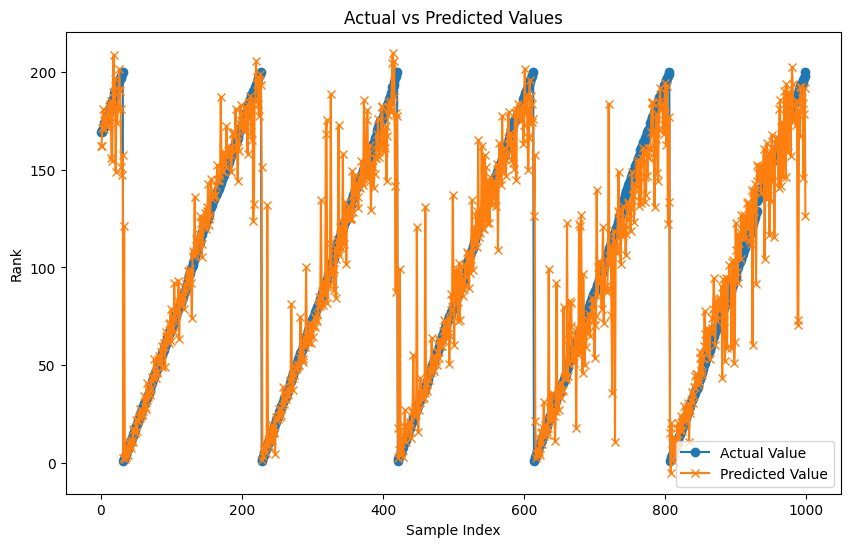

In [18]:
# 모델 예측값과 실제값 비교 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value', marker='o')  # 실제값 (첫 번째 열만 표시)
plt.plot(y_test_pred, label='Predicted Value', marker='x')  # 예측값 (첫 번째 열만 표시)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()